In [1]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path 
import pathlib
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


!pip install scikeras
import pandas
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import tree

#from google.colab import drive
#import os
#drive.mount("/content/gdrive")


In [3]:
coredata = pd.read_csv (r'C:\Users\demol\Desktop\EchoRidge\coredata.csv')   #read the csv file 
premiumdata = pd.read_csv (r'C:\Users\demol\Desktop\EchoRidge\premiumdata.csv')

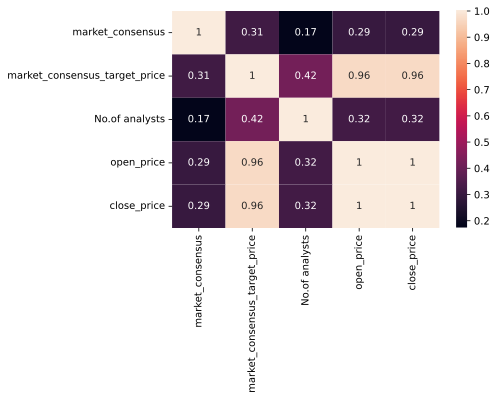

In [5]:
corr = coredata.corr()
sns.heatmap(corr, annot=True)
plt.show()

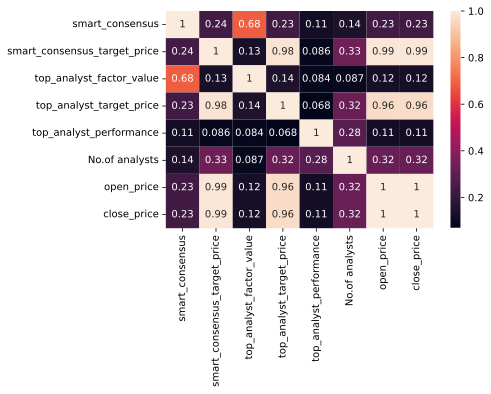

In [6]:
corr = premiumdata.corr()
sns.heatmap(corr, annot=True)
plt.show()

#Consider removing top analyst factor value and performance

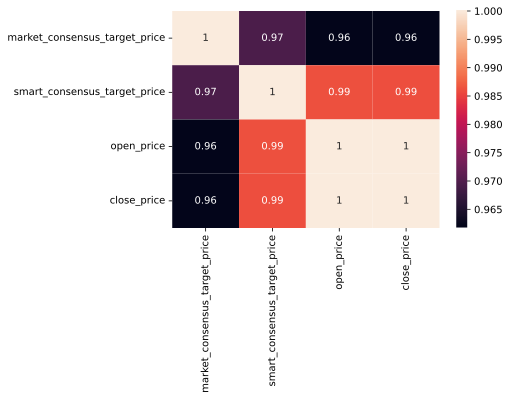

date                              object
security_name                     object
symbol                            object
No.of analysts                     int64
top_analyst_factor_value         float64
top_analyst_target_price         float64
top_analyst_name                  object
top_analyst_performance          float64
market_consensus                 float64
smart_consensus                  float64
market_consensus_target_price    float64
smart_consensus_target_price     float64
open_price                       float64
close_price                      float64
dtype: object

In [7]:
#Correlation with complete data
combineddata = pd.read_csv (r'C:\Users\demol\Desktop\EchoRidge\combineddata.csv')
df = combineddata.iloc[:, 10:14]
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()
combineddata.dtypes

In [8]:
#Correlation with one week - 2013
combineddata['date'] = pd.to_datetime(combineddata['date'])
combineddata = combineddata.sort_values(by='date', ascending = 'TRUE')  # Sorted by date
Week_1_data = combineddata.loc[(combineddata['date'] >= '2013-02-04') & (combineddata['date'] < '2013-02-09')]
Week_1_data = Week_1_data.iloc[:, 10:14]
corr = Week_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

ValueError: For argument "ascending" expected type bool, received type str.

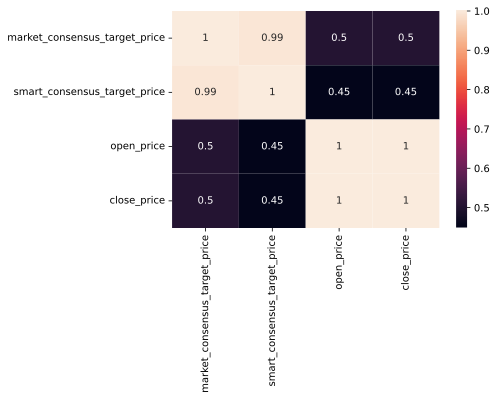

In [9]:
#Correlation with one month 
Month_1_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2013-03-01')]
Month_1_data = Month_1_data.iloc[:, 10:14]
corr = Month_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

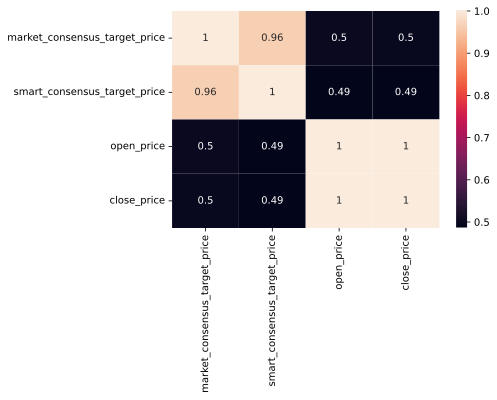

In [10]:
#Correlation with three months 
ThreeMonths_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2013-05-01')]
ThreeMonths_data = ThreeMonths_data.iloc[:, 10:14]
corr = ThreeMonths_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

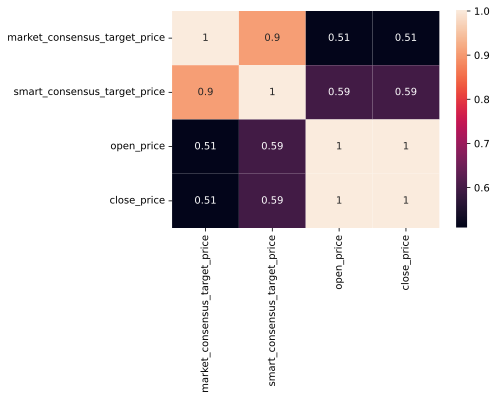

In [11]:
#Correlation with six months 
SixMonths_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2013-08-01')]
SixMonths_data = SixMonths_data.iloc[:, 10:14]
corr = SixMonths_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

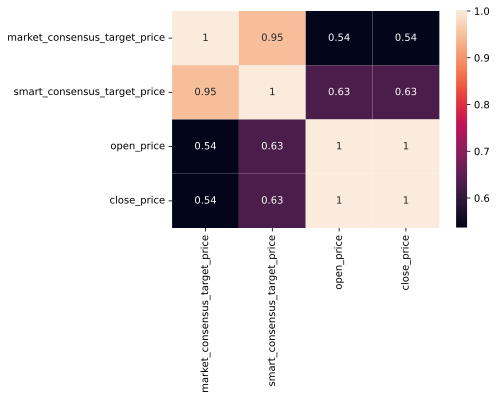

In [12]:
#Correlation with a year
OneYear_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2014-02-01')]
OneYear_data = OneYear_data.iloc[:, 10:14]
corr = OneYear_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

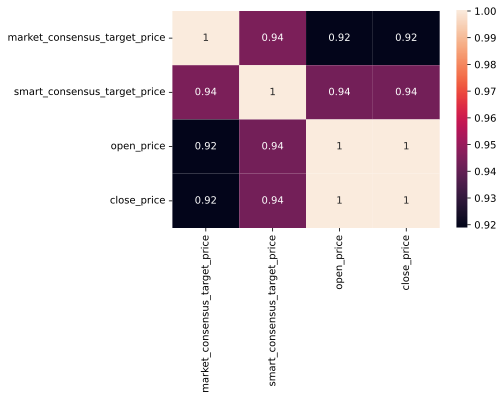

In [13]:
#Correlation with three years
ThreeYear_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2018-02-01')]
ThreeYear_data = ThreeYear_data.iloc[:, 10:14]
corr = ThreeYear_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

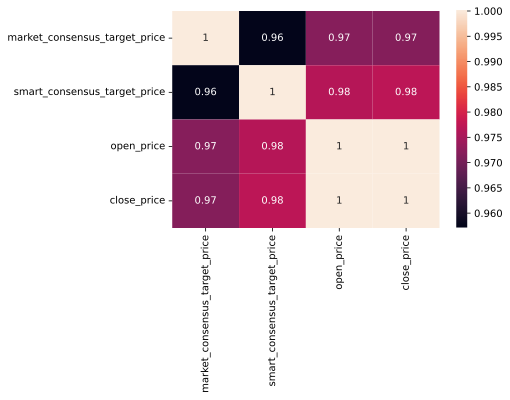

In [14]:
#Correlation with one week- 2016
Week_1_data = combineddata.loc[(combineddata['date'] >= '2016-04-18') & (combineddata['date'] < '2016-04-23')]
Week_1_data = Week_1_data.iloc[:, 10:14]
corr = Week_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

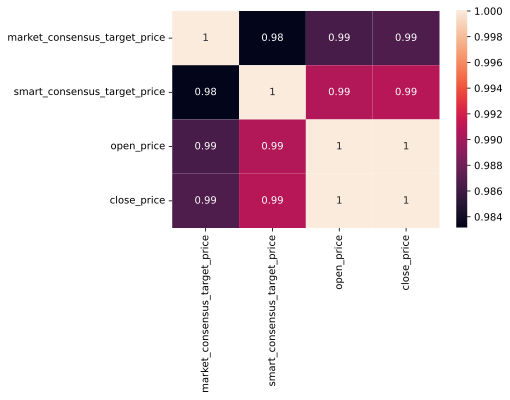

In [15]:
#Correlation with one week- 2017
Week_1_data = combineddata.loc[(combineddata['date'] >= '2017-05-01') & (combineddata['date'] < '2017-05-06')]
Week_1_data = Week_1_data.iloc[:, 10:14]
corr = Week_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

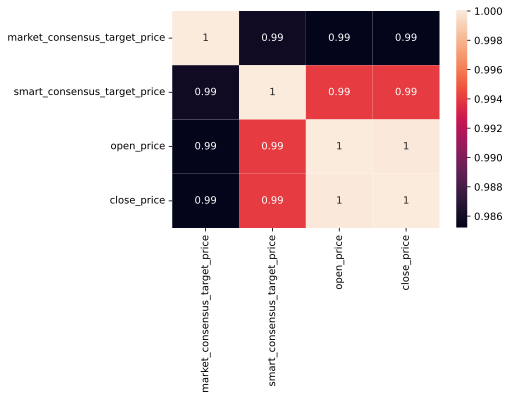

In [16]:
#Correlation with one week- 2020
Week_1_data = combineddata.loc[(combineddata['date'] >= '2021-04-05') & (combineddata['date'] < '2021-04-10')]
Week_1_data = Week_1_data.iloc[:, 10:14]
corr = Week_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [24]:
#Neural Network

#Dropping symbol column from combinedddata
data = combineddata.drop(columns = "symbol")

#One hot encoding 
data_one_hot_security_name: pd.DataFrame = pd.get_dummies(data, columns = ['security_name']) 
newdata: pd.DataFrame = pd.get_dummies(data_one_hot_security_name, columns = ['top_analyst_name'])

In [25]:
print(data)

             date  security_name  No.of analysts  top_analyst_factor_value  \
0      2013-01-31         3M Co.               9                      10.0   
1      2013-02-01         3M Co.               9                      10.0   
2      2013-02-04         3M Co.               9                      10.0   
3      2013-02-05         3M Co.               9                      10.0   
4      2013-02-06         3M Co.               9                      10.0   
...           ...            ...             ...                       ...   
116183 2021-11-01  Autodesk Inc.              12                      10.0   
116184 2021-11-02  Autodesk Inc.              12                      10.0   
116185 2021-11-03  Autodesk Inc.              12                      10.0   
116186 2021-11-04  Autodesk Inc.              12                      10.0   
116187 2021-11-05  Autodesk Inc.              12                      10.0   

        top_analyst_target_price   top_analyst_name  top_analys

In [18]:
#Encoding date
newdata["year"] = newdata["date"].dt.year
newdata["month"] = newdata["date"].dt.month
newdata["day"] = newdata["date"].dt.day
newdata["week"] = newdata["date"].dt.isocalendar().week
data = newdata.drop(columns = "date")
data

,No.of analysts,top_analyst_factor_value,top_analyst_target_price,top_analyst_performance,market_consensus,smart_consensus,market_consensus_target_price,smart_consensus_target_price,open_price,close_price,...,top_analyst_name_ubs_analyst,top_analyst_name_wedbush_analyst,top_analyst_name_wells_fargo_analyst,top_analyst_name_william_blair_analyst,top_analyst_name_wolfe_research_analyst,top_analyst_name_wunderlich_analyst,year,month,day,week
0,9,10.0,90.0,16.36,21.11,23.65,103.22,102.39,100.690000,100.550000,...,0,0,0,0,0,0,2013,1,31,5
1,9,10.0,90.0,17.53,21.11,23.90,103.22,102.52,101.440000,101.560000,...,0,0,0,0,0,0,2013,2,1,5
2,9,10.0,90.0,16.62,21.11,23.71,103.22,102.42,100.770000,100.770000,...,0,0,0,0,0,0,2013,2,4,6
3,9,10.0,90.0,17.45,21.11,23.89,103.22,102.51,101.310000,101.490000,...,0,0,0,0,0,0,2013,2,5,6
4,9,10.0,90.0,18.84,21.11,24.27,103.22,102.69,101.130000,102.690000,...,0,0,0,0,0,0,2013,2,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116183,12,10.0,324.0,35.55,30.00,38.71,239.07,347.40,318.500000,315.010010,...,0,0,0,0,0,0,2021,11,1,44
116184,12,10.0,324.0,35.54,30.00,38.71,239.07,347.40,315.309998,314.920013,...,0,0,0,0,0,0,2021,11,2,44
116185,12,10.0,324.0,34.92,30.00,38.33,239.07,347.34,313.709991,308.369995,...,0,0,0,0,0,0,2021,11,3,44
116186,12,10.0,324.0,35.93,30.00,38.92,239.07,347.43,308.859985,318.970001,...,0,0,0,0,0,0,2021,11,4,44


In [19]:
data = data.astype({'day':'float'})
data = data.astype({'week':'float'})
data = data.astype({'year':'float'})
data = data.astype({'month':'float'})
data = data.astype({'No.of analysts':'float'})
data

,No.of analysts,top_analyst_factor_value,top_analyst_target_price,top_analyst_performance,market_consensus,smart_consensus,market_consensus_target_price,smart_consensus_target_price,open_price,close_price,...,top_analyst_name_ubs_analyst,top_analyst_name_wedbush_analyst,top_analyst_name_wells_fargo_analyst,top_analyst_name_william_blair_analyst,top_analyst_name_wolfe_research_analyst,top_analyst_name_wunderlich_analyst,year,month,day,week
0,9.0,10.0,90.0,16.36,21.11,23.65,103.22,102.39,100.690000,100.550000,...,0,0,0,0,0,0,2013.0,1.0,31.0,5.0
1,9.0,10.0,90.0,17.53,21.11,23.90,103.22,102.52,101.440000,101.560000,...,0,0,0,0,0,0,2013.0,2.0,1.0,5.0
2,9.0,10.0,90.0,16.62,21.11,23.71,103.22,102.42,100.770000,100.770000,...,0,0,0,0,0,0,2013.0,2.0,4.0,6.0
3,9.0,10.0,90.0,17.45,21.11,23.89,103.22,102.51,101.310000,101.490000,...,0,0,0,0,0,0,2013.0,2.0,5.0,6.0
4,9.0,10.0,90.0,18.84,21.11,24.27,103.22,102.69,101.130000,102.690000,...,0,0,0,0,0,0,2013.0,2.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116183,12.0,10.0,324.0,35.55,30.00,38.71,239.07,347.40,318.500000,315.010010,...,0,0,0,0,0,0,2021.0,11.0,1.0,44.0
116184,12.0,10.0,324.0,35.54,30.00,38.71,239.07,347.40,315.309998,314.920013,...,0,0,0,0,0,0,2021.0,11.0,2.0,44.0
116185,12.0,10.0,324.0,34.92,30.00,38.33,239.07,347.34,313.709991,308.369995,...,0,0,0,0,0,0,2021.0,11.0,3.0,44.0
116186,12.0,10.0,324.0,35.93,30.00,38.92,239.07,347.43,308.859985,318.970001,...,0,0,0,0,0,0,2021.0,11.0,4.0,44.0


In [21]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [23]:
print(x)

        No.of analysts  top_analyst_target_price  top_analyst_performance  \
0                  9.0                      90.0                    16.36   
1                  9.0                      90.0                    17.53   
2                  9.0                      90.0                    16.62   
3                  9.0                      90.0                    17.45   
4                  9.0                      90.0                    18.84   
...                ...                       ...                      ...   
112516            12.0                     324.0                    35.55   
112517            12.0                     324.0                    35.54   
112518            12.0                     324.0                    34.92   
112519            12.0                     324.0                    35.93   
112520            12.0                     324.0                    36.45   

        market_consensus  smart_consensus  market_consensus_target_price  \

In [22]:
...
# load the dataset

data = data.dropna()
data = data.reset_index(drop = 'TRUE')


x = data.drop(["close_price","open_price","day","month","week","top_analyst_factor_value"], axis=1)
y = data["close_price"]

from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train)

#"day","month","week","security_name","top_analyst_name","top_analyst_factor_value"


       No.of analysts  top_analyst_target_price  top_analyst_performance  \
36379             4.0                     100.0                    14.01   
7816             10.0                      45.0                    22.07   
84619             5.0                      70.0                    12.17   
70748             9.0                     135.0                     7.80   
75607             6.0                     170.0                    17.23   
...               ...                       ...                      ...   
35649             9.0                      81.0                    48.96   
59847             6.0                      69.0                    17.29   
78492             6.0                      37.0                    37.25   
33771            11.0                      65.0                     1.98   
2394              8.0                      42.0                    17.95   

       market_consensus  smart_consensus  market_consensus_target_price  \
36379       

In [ ]:
#Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

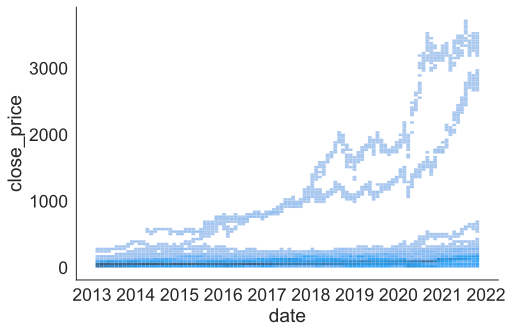

In [24]:
!pip install fitter
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=combineddata, x="date", y="close_price", bins = 100, aspect = 1.5)

In [ ]:

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

# transform data
#xscale=scaler.fit_transform(x)
#yscale = scaler.fit_transform(y.reshape(-1,1))

#X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
#print(y_train)

In [27]:
#Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense (units = 20, activation = "linear",input_dim = 472))

#Adding the second hidden layer
regressor.add(Dense(units = 20, activation = "linear"))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the ANN
regressor.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse','mae'])

# Fitting the ANN to the Training set
regressor.fit(X_train, y_train,batch_size = 5,epochs = 5)

Epoch 1/5
18004/18004 [==============================] - 67s 4ms/step - loss: 3322.0605 - mse: 3322.0605 - mae: 26.6784
Epoch 2/5
18004/18004 [==============================] - 70s 4ms/step - loss: 2617.0525 - mse: 2617.0525 - mae: 23.4890
Epoch 3/5
18004/18004 [==============================] - 84s 5ms/step - loss: 2440.1768 - mse: 2440.1768 - mae: 22.2563
Epoch 4/5
18004/18004 [==============================] - 89s 5ms/step - loss: 2369.2839 - mse: 2369.2839 - mae: 21.7876
Epoch 5/5
18004/18004 [==============================] - 24s 1ms/step - loss: 2314.3616 - mse: 2314.3616 - mae: 21.6005


In [ ]:
print(y_test)

In [28]:
predictions = regressor.predict(X_test)
print(predictions)

704/704 [==============================] - 2s 2ms/step
[[ 72.06619 ]
 [143.88351 ]
 [244.34683 ]
 ...
 [ 59.637215]
 [ 15.353129]
 [ 87.25232 ]]


In [ ]:
acc = regressor.evaluate(X_test,y_test)
print(acc)

In [30]:
#Random_Forest_Model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [31]:
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [32]:
regressor2.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [ ]:
print(X_train)

In [ ]:
print(y_test)

In [ ]:
predictions = regressor2.predict(X_test)
print(predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
# Finding the top performing analyst
mse_values = {}
for i in range(61,474):
  newdata=data[data.iloc[:,i] == 1]
  x = newdata.drop(["close_price","open_price","day","month","week","top_analyst_factor_value"], axis=1)
  y = newdata["close_price"].values
  predictions = regressor2.predict(x)
  mse = mean_squared_error(y, predictions)
  mse_values[newdata.columns[i]] = mse

print(mse_values)
print(min(mse_values, key=mse_values.get))
print(mse_values[min(mse_values, key=mse_values.get)])


In [ ]:
#z= data["close_price","No.of analysts"]

z = combineddata[["close_price","No.of analysts"]]
print(z)

In [ ]:
#Visualise the data
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()
sns.lmplot(x='no_of_analysts', y='close_price', data=z)
#sns.lmplot(x='housing_median_age', y='median_house_value', data=train)

In [ ]:
sns.lmplot(x='No.of analysts', y='close_price', data=z)

In [ ]:
print(X_train)

In [34]:
X_train2= X_train[["top_analyst_target_price",'No.of analysts']]
y_train2= y_train.astype(int)
print(X_train,y_train2)

       No.of analysts  top_analyst_target_price  top_analyst_performance  \
36379             4.0                     100.0                    14.01   
7816             10.0                      45.0                    22.07   
84619             5.0                      70.0                    12.17   
70748             9.0                     135.0                     7.80   
75607             6.0                     170.0                    17.23   
...               ...                       ...                      ...   
35649             9.0                      81.0                    48.96   
59847             6.0                      69.0                    17.29   
78492             6.0                      37.0                    37.25   
33771            11.0                      65.0                     1.98   
2394              8.0                      42.0                    17.95   

       market_consensus  smart_consensus  market_consensus_target_price  \
36379       

In [35]:
#SVR - Support Vector Regression
classifier = SVR(kernel='rbf')

In [ ]:
classifier.fit(X_train,y_train2)

In [ ]:
X_train.to_csv('a.csv')

In [36]:
#GBM - Gradient Booster

# fit the model on the whole dataset
model = GradientBoostingClassifier()

In [ ]:
model.fit(X_train, y_train2)

In [ ]:

# evaluate the model
#model = GradientBoostingClassifier()
#cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X_train, y_train2, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

